# Set Up the meta 

In [1]:
from osgeo import ogr, osr

In [2]:
driver = ogr.GetDriverByName('ESRI Shapefile')

In [3]:
dataset = driver.Open("/home/smitesh22/Data/GIS Extracted/N19E072_wgs84/planet_72,19_73,20-shp/shape/", 0)

In [4]:
layer_types = {
              0:'places',
              1: 'railway',
              2:'landuse',
              3:'natural',
              4:'point',
              5:'waterway',
              6:'road',
              7:'buildings'}

In [5]:
layer_metadata = {}
for num in layer_types:
    layer = dataset.GetLayer(num)
    
    attributes = []
    for feature in layer:
        attributes.append(feature.items())
    meta = set()
    
    for attr in attributes:
        #print(attr['type'])
        meta.add(attr['type'])
        
        
    layer_metadata[layer_types[num]] = meta

In [26]:
layer_metadata.keys()

dict_keys(['places', 'railway', 'landuse', 'natural', 'point', 'waterway', 'road', 'buildings'])

### Create Plot

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [8]:
shapefile_path = "/home/smitesh22/Data/GIS Extracted/N19E072_wgs84/planet_72,19_73,20-shp/shape/buildings.shp"
gdf = gpd.read_file(shapefile_path)

In [9]:
gdf

osm_id                           name              type  \
0         27036332           Siddhivinayak Mandir  place_of_worship   
1         27054842                            NaN               NaN   
2         27083473  Jayanti Jagannath Pendre Park               NaN   
3         38991543                     Trade View               NaN   
4         39352981                Mahindra Towers               NaN   
...            ...                            ...               ...   
113618  1188341339                            NaN               NaN   
113619  1188341340                            NaN               NaN   
113620  1188341341                            NaN               NaN   
113621  1188341342                            NaN               NaN   
113622  1188386896                              E       residential   

                                                 geometry  
0       POLYGON ((72.83040 19.01698, 72.83051 19.01684...  
1       POLYGON ((72.81644 19.13172, 72.81667 19.13128...  
2       POLYGON ((72.81234 19.13427, 72.81299 19.13460...  
3       POLYGON ((72.82622 19.00582, 72.82650 19.00582...  
4       POLYGON ((72.82142 19.00538, 72.82156 19.00560...  
...                                                   ...  
113618  POLYGON ((72.83517 19.20096, 72.83521 19.20096...  
113619  POLYGON ((72.83516 19.20099, 72.83517 19.20101...  
113620  POLYGON ((72.83521 19.20096, 72.83521 19.20098...  
113621  POLYGON ((72.83490 19.20110, 72.83490 19.20112...  
113622  POLYGON ((72.88802 19.03033, 72.88798 19.03012...  

[113623 rows x 4 columns]

In [10]:
gdf = gdf.to_crs("EPSG:3857")

In [11]:
#100 meters buffer
gdf['geometry'] = gdf['geometry'].buffer(100)

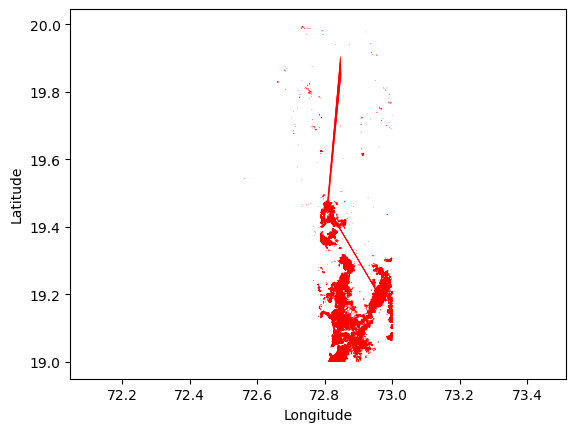

In [12]:
# Convert the GeoDataFrame to a geographic CRS if it's not already
# WGS 84 (EPSG:4326) is a common choice that uses degrees for latitude and longitude
gdf = gdf.to_crs(epsg=4326)

# Plot the data
gdf.plot(color='red')

# Add labels for clarity
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Ensure that the axes are equally scaled
plt.axis('equal')

# Show the plot
plt.show()

In [13]:
gdf

osm_id                           name              type  \
0         27036332           Siddhivinayak Mandir  place_of_worship   
1         27054842                            NaN               NaN   
2         27083473  Jayanti Jagannath Pendre Park               NaN   
3         38991543                     Trade View               NaN   
4         39352981                Mahindra Towers               NaN   
...            ...                            ...               ...   
113618  1188341339                            NaN               NaN   
113619  1188341340                            NaN               NaN   
113620  1188341341                            NaN               NaN   
113621  1188341342                            NaN               NaN   
113622  1188386896                              E       residential   

                                                 geometry  
0       POLYGON ((72.82987 19.01611, 72.82987 19.01611...  
1       POLYGON ((72.81604 19.13248, 72.81651 19.13269...  
2       POLYGON ((72.81155 19.13387, 72.81130 19.13432...  
3       POLYGON ((72.82532 19.00582, 72.82533 19.00590...  
4       POLYGON ((72.82097 19.00465, 72.82090 19.00469...  
...                                                   ...  
113618  POLYGON ((72.83429 19.20113, 72.83431 19.20121...  
113619  POLYGON ((72.83503 19.20015, 72.83494 19.20017...  
113620  POLYGON ((72.83506 19.20012, 72.83502 19.20012...  
113621  POLYGON ((72.83400 19.20110, 72.83400 19.20111...  
113622  POLYGON ((72.88809 19.03117, 72.88824 19.03116...  

[113623 rows x 4 columns]

In [14]:
import re
import pandas as pd
import glob

def get_suitable_area(shapefile_path, buffer):
    """
    params : shapefile_path : location where shp files for the geolocations are present
             buffer : buffer distance in meters
    
    output : Geodataframe with features needed to be considered along with a buffer of 100 meters
    
    """
    
    gdfs = []
    
    #shapefile_path = "/home/smitesh22/Data/GIS Extracted/N19E072_wgs84/planet_72,19_73,20-shp/shape/landuse.shp"
    
    #get all the shapefiles available for the geolocation
    shape_files = glob.glob(f'{shapefile_path}*.shp')
    #print(shape_files)
    #loop over each shape file
    for shape_file in shape_files:
        
        match = re.search(r'([^/]+)\.shp$', shape_file)
        #feature to identiy layer
        feature = match.group(1)
        
        #print(shape_file)
        gdf = gpd.read_file(shape_file)
        
        #EPSG:3395 (World Mercator) uses metric system
        gdf = gdf.to_crs(epsg=3395)
        
        #add a buffer of 100 meters
        gdf['geometry'] = gdf['geometry'].buffer(buffer)
        
        #conditions on each layer to select CERTAIN attribute values only
        if feature == "places":
            pass
        elif feature == "landuse":
            filtered_gdf = gdf[~gdf['type'].isin(['vacant', 'barren'])]
        elif feature == "natural":
            pass
        
        filtered_gdf = gdf
        
        filtered_gdf['feature'] = feature
        
        gdfs.append(filtered_gdf)
        
        # Concatenate all the GeoDataFrames in the list
    combined_gdf = pd.concat(gdfs, ignore_index=True)
        
        #print(combined_gdf)
    return combined_gdf

In [15]:
combined_gdf = get_suitable_area("/home/smitesh22/Data/GIS Extracted/N09E078_wgs84/planet_78,9_79,10-shp/shape/", 0)

In [16]:
combined_gdf

osm_id            name     type  population  \
0       245582627      Sevalpatti  village         NaN   
1       245582675    Vilattikulam     town         NaN   
2       245583689     Sethu Karai  village         NaN   
3       245583770           Pudur  village         NaN   
4       245583830  Agastiarkuttam  village         NaN   
...           ...             ...      ...         ...   
68955  1181465690             NaN      NaN         NaN   
68956  1185073614             NaN      NaN         NaN   
68957  1185073615             NaN      NaN         NaN   
68958  1185073616             NaN      NaN         NaN   
68959  1185073617             NaN      NaN         NaN   

                                                geometry    feature  \
0                                          POLYGON EMPTY     places   
1                                          POLYGON EMPTY     places   
2                                          POLYGON EMPTY     places   
3                                          POLYGON EMPTY     places   
4                                          POLYGON EMPTY     places   
...                                                  ...        ...   
68955  POLYGON ((8699297.372 1100138.191, 8699309.561...  buildings   
68956  POLYGON ((8699367.748 1101441.708, 8699363.239...  buildings   
68957  POLYGON ((8699365.655 1101393.656, 8699365.399...  buildings   
68958  POLYGON ((8699416.261 1101391.747, 8699420.970...  buildings   
68959  POLYGON ((8699417.953 1101439.552, 8699418.198...  buildings   

       timestamp  width  ref  oneway  bridge  maxspeed  
0            NaN    NaN  NaN     NaN     NaN       NaN  
1            NaN    NaN  NaN     NaN     NaN       NaN  
2            NaN    NaN  NaN     NaN     NaN       NaN  
3            NaN    NaN  NaN     NaN     NaN       NaN  
4            NaN    NaN  NaN     NaN     NaN       NaN  
...          ...    ...  ...     ...     ...       ...  
68955        NaN    NaN  NaN     NaN     NaN       NaN  
68956        NaN    NaN  NaN     NaN     NaN       NaN  
68957        NaN    NaN  NaN     NaN     NaN       NaN  
68958        NaN    NaN  NaN     NaN     NaN       NaN  
68959        NaN    NaN  NaN     NaN     NaN       NaN  

[68960 rows x 12 columns]

In [17]:
# Calculate the total area
total_area = combined_gdf['geometry'].area.sum()

# Print the result
print(f"The total area is {total_area/1000} square units.")

The total area is 474771.011699636 square units.


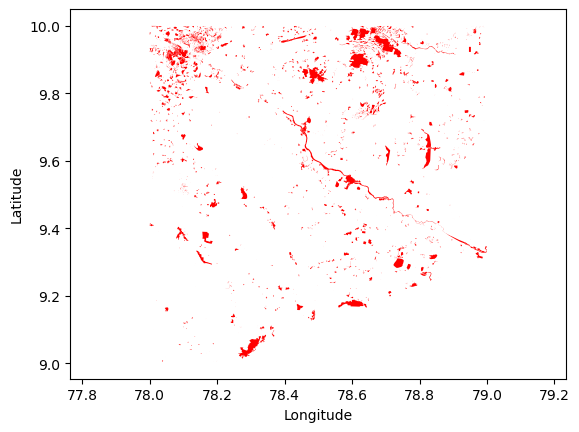

In [18]:
# Convert the GeoDataFrame to a geographic CRS if it's not already
# WGS 84 (EPSG:4326) is a common choice that uses degrees for latitude and longitude
combined_gdf = combined_gdf.to_crs(epsg=4326)

# Plot the data
combined_gdf.plot(color='red')

# Add labels for clarity
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Ensure that the axes are equally scaled
plt.axis('equal')

# Show the plot
plt.show()

In [19]:
def calculate_middle_coordinates(lat_ul, lon_ul, lat_lr, lon_lr):
    upper_middle = ((lat_ul + lat_lr) / 2, lon_ul)
    left_middle = (lat_ul, (lon_ul + lon_lr) / 2)
    right_middle = (lat_lr, (lon_ul + lon_lr) / 2)
    lower_middle = ((lat_ul + lat_lr) / 2, lon_lr)
    
    return upper_middle, left_middle, right_middle, lower_middle

# Example usage:
lat_ul = 16.0001388888888
lon_ul = 79.0001388888889
lat_lr = 14.9998611111111
lon_lr = 77.9998611111111



In [20]:
combined_gdf

osm_id            name     type  population  \
0       245582627      Sevalpatti  village         NaN   
1       245582675    Vilattikulam     town         NaN   
2       245583689     Sethu Karai  village         NaN   
3       245583770           Pudur  village         NaN   
4       245583830  Agastiarkuttam  village         NaN   
...           ...             ...      ...         ...   
68955  1181465690             NaN      NaN         NaN   
68956  1185073614             NaN      NaN         NaN   
68957  1185073615             NaN      NaN         NaN   
68958  1185073616             NaN      NaN         NaN   
68959  1185073617             NaN      NaN         NaN   

                                                geometry    feature  \
0                                          POLYGON EMPTY     places   
1                                          POLYGON EMPTY     places   
2                                          POLYGON EMPTY     places   
3                                          POLYGON EMPTY     places   
4                                          POLYGON EMPTY     places   
...                                                  ...        ...   
68955  POLYGON ((78.14712 9.89903, 78.14723 9.89898, ...  buildings   
68956  POLYGON ((78.14775 9.91065, 78.14771 9.91065, ...  buildings   
68957  POLYGON ((78.14773 9.91022, 78.14773 9.91018, ...  buildings   
68958  POLYGON ((78.14819 9.91020, 78.14823 9.91020, ...  buildings   
68959  POLYGON ((78.14820 9.91063, 78.14820 9.91067, ...  buildings   

       timestamp  width  ref  oneway  bridge  maxspeed  
0            NaN    NaN  NaN     NaN     NaN       NaN  
1            NaN    NaN  NaN     NaN     NaN       NaN  
2            NaN    NaN  NaN     NaN     NaN       NaN  
3            NaN    NaN  NaN     NaN     NaN       NaN  
4            NaN    NaN  NaN     NaN     NaN       NaN  
...          ...    ...  ...     ...     ...       ...  
68955        NaN    NaN  NaN     NaN     NaN       NaN  
68956        NaN    NaN  NaN     NaN     NaN       NaN  
68957        NaN    NaN  NaN     NaN     NaN       NaN  
68958        NaN    NaN  NaN     NaN     NaN       NaN  
68959        NaN    NaN  NaN     NaN     NaN       NaN  

[68960 rows x 12 columns]

In [21]:
import folium
import geopandas as gpd
from shapely.geometry import Polygon

# Assuming `gdf` is your GeoPandas DataFrame with the polygons
# ...

ne_latitude = 10
ne_longitude = 79
sw_latitude = 9
sw_longitude = 78

# Calculate center latitude and longitude
center_latitude = (sw_latitude + ne_latitude) / 2
center_longitude = (sw_longitude + ne_latitude) / 2

# Create a folium map at the center
m = folium.Map(location=[center_latitude, center_longitude], zoom_start=10)

# Highlight the defined area with a rectangle
folium.Rectangle(
    bounds=[(sw_latitude, sw_longitude), (ne_latitude, ne_longitude)],
    color="#ff7800",
    fill=True,
    fill_color="#ffff00",
    fill_opacity=0.2,
).add_to(m)

# Combine all polygons into one (if not already done)
combined_polygon = combined_gdf['geometry'].unary_union

# Plot the combined polygon on the map
folium.GeoJson(combined_polygon).add_to(m)

# Display the map in Jupyter or save to a file
m


In [22]:
import folium
import geopandas as gpd
from shapely.geometry import Polygon

# Assuming `gdf` is your GeoPandas DataFrame with the polygons
# ...

ne_latitude = 10
ne_longitude = 79
sw_latitude = 9
sw_longitude = 78

# Calculate center latitude and longitude
center_latitude = (sw_latitude + ne_latitude) / 2
center_longitude = (sw_longitude + ne_latitude) / 2

# Create a folium map at the center
m = folium.Map(location=[center_latitude, center_longitude], zoom_start=10)

# Highlight the defined area with a rectangle
folium.Rectangle(
    bounds=[(sw_latitude, sw_longitude), (ne_latitude, ne_longitude)],
    color="#ff7800",
    fill=True,
    fill_color="#ffff00",
    fill_opacity=0.2,
).add_to(m)

# Subtract the union of your existing polygons from the large polygon
complementary_geometry = combined_polygon.difference(combined_polygon)

# Plot the complementary geometry on the map
folium.GeoJson(complementary_geometry, 
               style_function=lambda x: {'fillColor': '#0000ff'}).add_to(m)

# Display the map in Jupyter or save to a file
m


In [23]:
from shapely.geometry import box

# Create a bounding box that covers the entire area you're interested in
# (You might need to customize this to suit your data)
bounds = combined_polygon.bounds
large_polygon = box(bounds[0] - 1, bounds[1] - 1, bounds[2] + 1, bounds[3] + 1)

# Subtract the union of your existing polygons from the large polygon
complementary_geometry = large_polygon.difference(combined_polygon)

# Plot the complementary geometry on the map
folium.GeoJson(complementary_geometry, 
               style_function=lambda x: {'fillColor': 'green',
                                        'fill': True,
                                        'fill_opacity': 1}).add_to(m)


In [24]:
m.save('map.html')

In [25]:
from selenium import webdriver
import chromedriver_autoinstaller

# Automatically download and install Chrome WebDriver
chromedriver_autoinstaller.install()

# Create a new Chrome session
driver = webdriver.Chrome()

# Set the window size to match the dimensions of the bounding box
driver.set_window_size(800, 600)  # You may need to adjust these values

# Convert the Folium map to HTML
html = m.get_root().render()

# Create a temporary HTML file
with open('temp_map.html', 'w') as file:
    file.write(html)

# Open the temporary HTML file in Chrome
driver.get('file:///path/to/temp_map.html')  # Adjust the path to the temporary file

# Take a screenshot and save it as an image file
driver.save_screenshot('map_image.png')

# Close the Chrome session
driver.quit()
